In [22]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch import optim
import numpy as np
%matplotlib inline

In [45]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.FashionMNIST("pytorch/MNIST_data/",train=True,transform=transform,download=True)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64)

Extracting pytorch/MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to pytorch/MNIST_data/FashionMNIST\raw



Extracting pytorch/MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to pytorch/MNIST_data/FashionMNIST\raw


Extracting pytorch/MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to pytorch/MNIST_data/FashionMNIST\raw



Extracting pytorch/MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to pytorch/MNIST_data/FashionMNIST\raw
Processing...
Done!


In [10]:
from CustomDataset import CatsAndDogsDatasets
dataset = CatsAndDogsDatasets(csv_file='CatsAndDogs\cats_dogs.csv',root_dir='CatsAndDogs/cats_dogs_resized/',transform=transforms.ToTensor())

In [32]:
print(dataset.__len__())
batch_size = 1
train_set , test_set = torch.utils.data.random_split(dataset,[5,5])
train_loader = DataLoader(dataset=train_set,batch_size=batch_size,shuffle=True)

10


In [33]:
train_sample = next(iter(train_loader))

torch.Size([3, 224, 224])


TypeError: Invalid shape (3, 224, 224) for image data

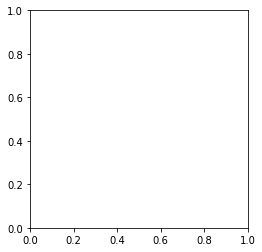

In [34]:
print(train_sample[0][0].shape)
plt.imshow(train_sample[0][0])

In [46]:
input_size = trainloader.dataset.data.shape[1] * trainloader.dataset.data.shape[2]
print(input_size)

784


In [47]:
input_size = 784
hidden_layers = [128,64]
output_size = 10

In [48]:
model = nn.Sequential(
    nn.Linear(input_size,hidden_layers[0]),
    nn.ReLU(),
    nn.Linear(hidden_layers[0],hidden_layers[1]),
    nn.ReLU(),
    nn.Linear(hidden_layers[1],output_size),
    nn.LogSoftmax(dim=1)
)

In [49]:
print(model)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.003)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [50]:
epochs  = 5
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Training loss: " , (running_loss/len(trainloader)))

RuntimeError: output with shape [1, 28, 28] doesn't match the broadcast shape [3, 28, 28]